# Stock Market Prediction using Time-series and Daily News Analysis
## Time Series Forecasting With Prophet
The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It implements a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.
### Load data

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime as dt
from fbprophet import Prophet

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

pd.set_option('mode.chained_assignment', 'raise') # Raise an exception, warn, or no action if trying to use chained assignment

Importing plotly failed. Interactive plots will not work.


In [2]:
# Read the combines stock index CSV data file from the data directory
dataset = pd.read_csv('data/comb_data_final.csv',index_col='Date',parse_dates=True)

In [3]:
dataset.head(1)

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""


### Preprocessing
Prophet model takes a data frame of time series data of specific format. The first column must have the name 'ds' and contain the datetime values. The second column must have the name 'y' and contain the observations.

In [4]:
# Create a separate dataset
new_data = dataset.reset_index()[['Date', 'Adj Close']]
new_data.head(3)

,Date,Adj Close
0,2008-08-08,11734.320312
1,2008-08-11,11782.349609
2,2008-08-12,11642.469727


In [5]:
# Preparing data for Prophet model by changing column names - 1st requirement
new_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True) 
new_data.head(3)

,ds,y
0,2008-08-08,11734.320312
1,2008-08-11,11782.349609
2,2008-08-12,11642.469727


In [6]:
# 2nd requirement: 'ds' column needs to contain the datetime values
new_data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [7]:
new_data.shape

(1989, 2)

### Train and test split

In [8]:
# Set the threshold two years before the last date (at the beginning of 7th year)
threshold = new_data['ds'].max() - pd.DateOffset(years=2) 
# Create Train and Test datasets
X_train = new_data[new_data['ds'] <= threshold]
X_test = new_data[new_data['ds'] > threshold]
X_train.shape, X_test.shape

((1484, 2), (505, 2))

### Model



In [129]:
# Initialize Prophet
model1 = Prophet()
model1.fit(X_train)

# define the prediction period which is the X_test
future_test1 = pd.DataFrame(X_test['ds'], columns=['ds'])

# use the model to make a forecast
forecast1 = model1.predict(future_test1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [146]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
502,2016-06-29,19997.012510,8895.153108,30842.940326
503,2016-06-30,20006.896957,8752.620907,30870.898773
504,2016-07-01,20018.349460,8711.500257,31230.148422


In [140]:
# rmse
forecast_test1 = forecast1['yhat']
rmse=np.sqrt(np.mean(np.power((np.array(X_test['y'])-np.array(forecast_test1)),2)))
rmse

1582.5596525392398

MAE: 1582.560


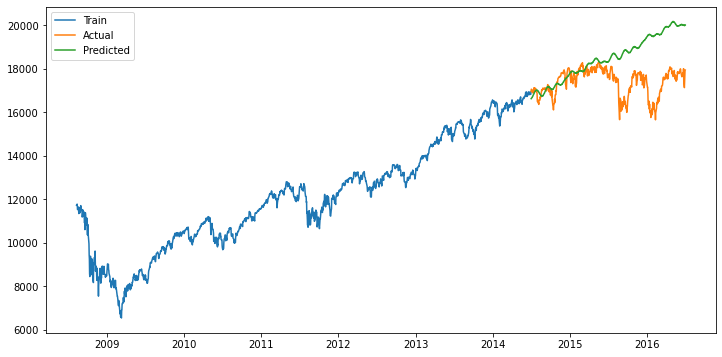

In [168]:
 #Plot
y_true = X_test[['ds','y']].set_index('ds')
y_pred = forecast1[['ds','yhat']].set_index('ds')
y_train = X_train[['ds','y']].set_index('ds')

print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_train, label='Train')
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### Second Try using make_future_dataframe

In [141]:
#implement Prophet
model2 = Prophet()
model2.fit(X_train)

#predictions
future_test2 = model2.make_future_dataframe(periods=len(X_test))
forecast2 = model2.predict(future_test2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [145]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1484:].tail(3)

,ds,yhat,yhat_lower,yhat_upper
1986,2015-11-16,18947.404792,12277.853059,25291.060672
1987,2015-11-17,18959.814446,12296.875221,25179.177714
1988,2015-11-18,18942.255650,12177.176340,25370.131975


In [143]:
#rmse
forecast_valid2 = forecast2['yhat'][1484:]
rms=np.sqrt(np.mean(np.power((np.array(X_test['y'])-np.array(forecast_valid2)),2)))
rms

1021.6297886868056

### Third Try using test value in iterative process

In [25]:
X_train1 = X_train.copy()
model_predictions = []
N_test_observations = len(X_test)

for time_point in range(N_test_observations):
    model = Prophet()
    model_fit = model.fit(X_train1)
    output = model_fit.predict()
    yhat = output['yhat'][0]
    model_predictions.append(yhat)
    true_test_value = X_test.iloc[time_point:time_point+1]
    X_train1.append(true_test_value)

MSE_error = mean_squared_error(X_test, model_predictions)
print('Root Mean Squared Error is {}'.format(np.sqrt(MSE_error)))

e this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasona

TypeError: invalid type promotion